In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('airline_tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.shape

(14640, 15)

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

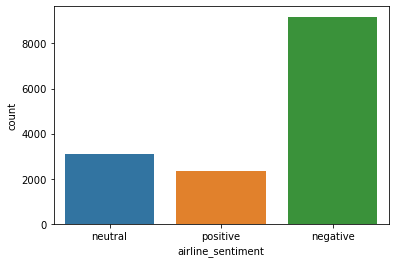

In [7]:
sns.countplot(data=df,x='airline_sentiment')

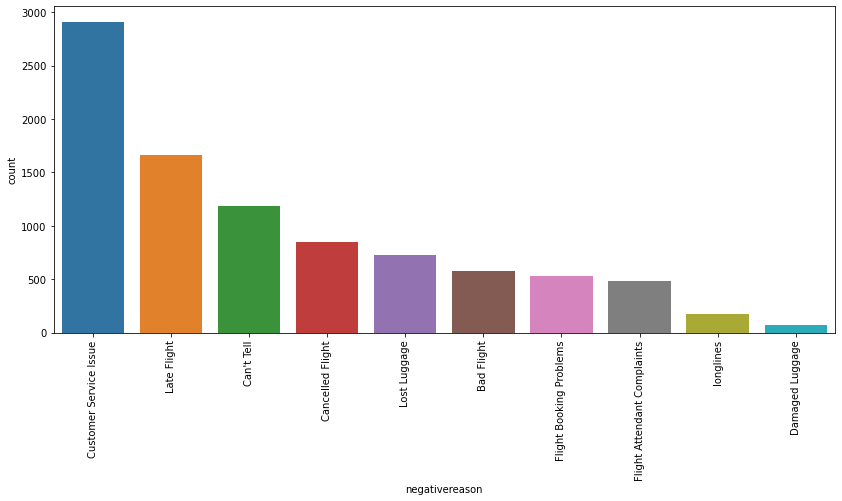

In [8]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='negativereason',order=df.negativereason.value_counts().index)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='airline', ylabel='count'>

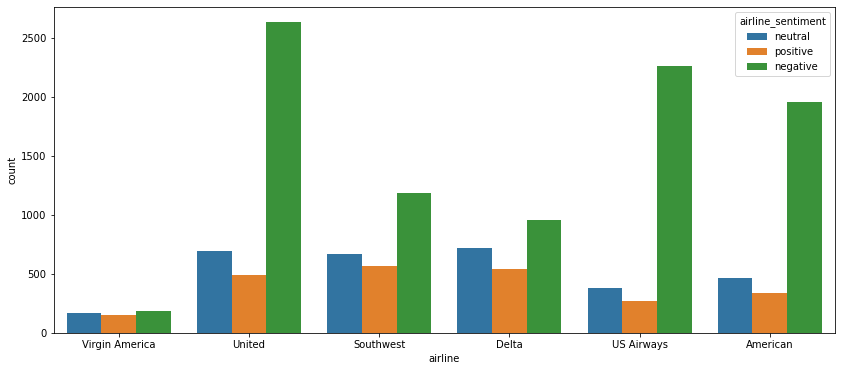

In [9]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='airline',hue='airline_sentiment')

In [10]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

#### It looks like imbalance dataset.

## Feature Engineering

In [11]:
data= df[['airline_sentiment','text']]

In [12]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [13]:
data.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [14]:
data.airline_sentiment=data.airline_sentiment.map({'negative':0,'neutral':1, 'positive':2 })

In [15]:
data.head()

,airline_sentiment,text
0,1,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials t...
2,1,@VirginAmerica I didn't today... Must mean I n...
3,0,@VirginAmerica it's really aggressive to blast...
4,0,@VirginAmerica and it's a really big bad thing...


In [16]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shridatta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shridatta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
def preprocessor(data):
    corpus = []
    for i in range(len(data)):
        text= re.sub('[^a-zA-Z]', ' ', data['text'][i])
        review = text.lower()
        words = review.split()
        lemmatizer = WordNetLemmatizer()
        spl_words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
        tweets = ' '.join(spl_words)
        corpus.append(tweets)
    return corpus  

In [18]:
corpus=preprocessor(data)

In [19]:
corpus[:5]

['virginamerica dhepburn said',
 'virginamerica plus added commercial experience tacky',
 'virginamerica today must mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse',
 'virginamerica really big bad thing']

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf=TfidfVectorizer(max_features=5000)
vectors=tfidf.fit_transform(corpus).toarray()
feature_names=tfidf.get_feature_names()

In [22]:
X=pd.DataFrame(vectors,columns=feature_names)
y=data['airline_sentiment']

In [23]:
## Handling imbalance dataset
from imblearn.over_sampling import SMOTE
from collections import Counter

In [24]:
oversample=SMOTE()

Class=1, n=9178 (33.333%)
Class=2, n=9178 (33.333%)
Class=0, n=9178 (33.333%)


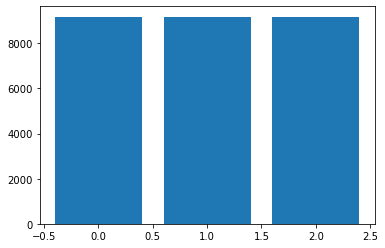

In [25]:
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

## Model Analysis

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [29]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [30]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [31]:
li_svc=LinearSVC()
li_svc.fit(X_train,y_train)

LinearSVC()

In [32]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [34]:
def report(model):
    pred=model.predict(X_test)
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    plot_confusion_matrix(model,X_test,y_test)
    

0.8255659121171771
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      2807
           1       0.80      0.75      0.77      2708
           2       0.85      0.90      0.87      2746

    accuracy                           0.83      8261
   macro avg       0.82      0.83      0.82      8261
weighted avg       0.82      0.83      0.82      8261



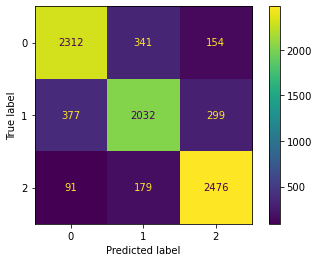

In [35]:
report(nb)

0.8433603679941896
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2807
           1       0.78      0.83      0.81      2708
           2       0.89      0.89      0.89      2746

    accuracy                           0.84      8261
   macro avg       0.84      0.84      0.84      8261
weighted avg       0.84      0.84      0.84      8261



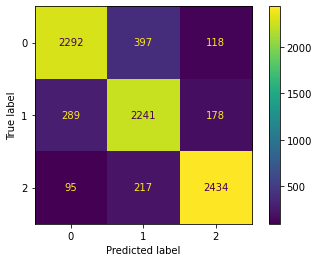

In [36]:
report(log_model)

0.8592180123471734
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2807
           1       0.81      0.85      0.83      2708
           2       0.89      0.92      0.90      2746

    accuracy                           0.86      8261
   macro avg       0.86      0.86      0.86      8261
weighted avg       0.86      0.86      0.86      8261



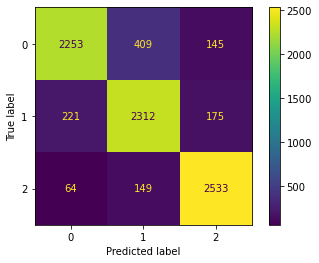

In [37]:
report(li_svc)

0.8805229391114877
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2807
           1       0.85      0.86      0.85      2708
           2       0.93      0.92      0.92      2746

    accuracy                           0.88      8261
   macro avg       0.88      0.88      0.88      8261
weighted avg       0.88      0.88      0.88      8261



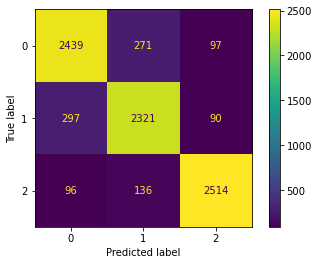

In [38]:
report(rf)